# 非线性回归

## 模型

回归曲线不符合线性模型

### 解决方案

1. 先画出散点图，观察形态

2. 根据图像选择拟合方法

    - 配曲线法

        用带参数的曲线模型，求参数拟合

    - 多项式法

        用多项式拟合

## 实现

In [628]:
import numpy as np

#! 修改统计学参数
# 置信水平
ALPHA = .05

### 配曲线法

In [629]:
from scipy.optimize import curve_fit

#! 修改训练集数据
true_func = lambda x: 2 * np.exp(-3 / x) + 1
x_data = np.linspace(0.1, 5, 100)
y_data = true_func(x_data) + np.random.normal(0, 0.01, x_data.shape)

#! 修改建模曲线
# x 可以是多元元组
model_func = lambda x, a, b, c: a * np.exp(b / x) + c

#### 拟合

In [630]:
popt, pcov = curve_fit(
    f = model_func,
    xdata = x_data,
    ydata = y_data,
    # 最大迭代次数
    maxfev=10000, 
    # 参数初始值
    #* 在该例中初始参数值不正确给定则无法正确拟合
    p0=[0, -.1, .1],
)
pfit = lambda x: model_func(x, *popt)

print(f"拟合结果参数: {popt}")

拟合结果参数: [ 2.01501062 -3.030604    1.00280292]


#### 显著性验证

采用 t 检验

In [631]:
from scipy.stats import t

# 计算自由度（degrees of freedom）
# 自由度 = 样本数 - 参数个数
df = len(x_data) - len(popt)

# 计算标准误差
perr = np.sqrt(np.diag(pcov))
z_value = t.ppf(1 - ALPHA / 2, df) # 95% 置信水平的 z 值

# 计算 t-统计量
t_values = popt / perr

# 计算 p 值
p = 2 * t.sf(np.abs(t_values), df)

print("\n--- 显著性检验结果 ---")
for i, (p_val, p_err, t_val, pp) in enumerate(zip(popt, perr, t_values, p)):
    lower_bound = p_val - z_value * p_err
    upper_bound = p_val + z_value * p_err
    
    print(f"系数 {i} (popt[{i}]):")
    print(f"  估计值：{p_val:.4f}")
    print(f"  标准误差：{p_err:.4f}")
    print(f"  t-统计量：{t_val:.4f}")
    print(f"  {1 - ALPHA:.2%} 置信区间: [{lower_bound:.4f}, {upper_bound:.4f}]")
    print(f"  p 值: {pp}")
    
    # 判断显著性
    if pp <= ALPHA:
        print("  --> 参数显著！")
    else:
        print("  --> 参数不显著 (置信区间包含0)。")


--- 显著性检验结果 ---
系数 0 (popt[0]):
  估计值：2.0150
  标准误差：0.0098
  t-统计量：205.8403
  95.00% 置信区间: [1.9956, 2.0344]
  p 值: 6.393396386687502e-130
  --> 参数显著！
系数 1 (popt[1]):
  估计值：-3.0306
  标准误差：0.0220
  t-统计量：-137.6650
  95.00% 置信区间: [-3.0743, -2.9869]
  p 值: 4.93766794831834e-113
  --> 参数显著！
系数 2 (popt[2]):
  估计值：1.0028
  标准误差：0.0025
  t-统计量：395.2727
  95.00% 置信区间: [0.9978, 1.0078]
  p 值: 2.259076956410704e-157
  --> 参数显著！


In [632]:
# 2. 使用 curve_fit 进行拟合
y_fit = pfit(x_data)

# 3. 计算 R^2
# 计算因变量的均值
y_mean = np.mean(y_data)

# 计算总平方和 (SST)
# 总变异 = (原始数据点 - 均值) 的平方和
sst = np.sum((y_data - y_mean)**2)

# 计算残差平方和 (SSR)
# 未解释的变异 = (原始数据点 - 拟合曲线) 的平方和
ssr = np.sum((y_data - y_fit)**2)

# 计算 R^2
r_squared = 1 - (ssr / sst)

print(f"拟合得到的 R^2 值为: {r_squared:.4f}")

拟合得到的 R^2 值为: 0.9993


#### 绘图

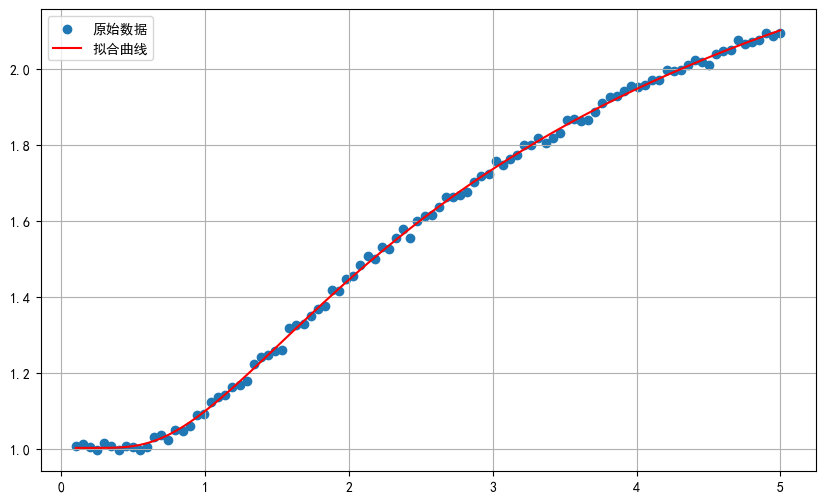

In [633]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei' # 中文支持

fig, ax = plt.subplots(figsize=(10, 6))

# 绘制原始数据
ax.scatter(x_data, y_data, label='原始数据')

# 绘制拟合曲线
ax.plot(x_data, model_func(x_data, *popt), color='red', label='拟合曲线')

ax.grid(True)
ax.legend()
plt.show()

### 多项式法

In [634]:
import numpy as np

#! 修改训练集数据
true_func = lambda x: 1 + 2 * x + 3 * x ** 2
x_data = np.linspace(0.1, 5, 100)
y_data = true_func(x_data) + np.random.normal(0, 1, x_data.shape)

#! 修改拟合参数
# 最高次项
# 过低细节不足，过高过拟合/显著性低
DEG = 2

#### 拟合

In [635]:
popt, pcov = np.polyfit(x_data, y_data, deg=DEG, cov=True)
pfit = np.poly1d(popt)

print(f"拟合结果参数(从高阶到低阶): {popt}")

拟合结果参数(从高阶到低阶): [2.96986901 2.32515291 0.40207944]


#### 显著性检验

采用 t 检验

In [636]:
from scipy.stats import t

# 计算自由度（degrees of freedom）
# 自由度 = 样本数 - 参数个数
df = len(x_data) - len(popt)

# 计算标准误差
perr = np.sqrt(np.diag(pcov))
z_value = t.ppf(1 - ALPHA / 2, df) # 95% 置信水平的 z 值

# 计算 t-统计量
t_values = popt / perr

# 计算 p 值
p = 2 * t.sf(np.abs(t_values), df)

print("\n--- 显著性检验结果 ---")
for i, (p_val, p_err, t_val, pp) in enumerate(zip(popt, perr, t_values, p)):
    lower_bound = p_val - z_value * p_err
    upper_bound = p_val + z_value * p_err
    
    print(f"系数 {i} (popt[{i}]):")
    print(f"  估计值：{p_val:.4f}")
    print(f"  标准误差：{p_err:.4f}")
    print(f"  t-统计量：{t_val:.4f}")
    print(f"  {1 - ALPHA:.2%} 置信区间: [{lower_bound:.4f}, {upper_bound:.4f}]")
    print(f"  p 值: {pp}")
    
    # 判断显著性
    if pp <= ALPHA:
        print("  --> 参数显著！")
    else:
        print("  --> 参数不显著。")


--- 显著性检验结果 ---
系数 0 (popt[0]):
  估计值：2.9699
  标准误差：0.0527
  t-统计量：56.3267
  95.00% 置信区间: [2.8652, 3.0745]
  p 值: 6.586576956488143e-76
  --> 参数显著！
系数 1 (popt[1]):
  估计值：2.3252
  标准误差：0.2772
  t-统计量：8.3876
  95.00% 置信区间: [1.7750, 2.8753]
  p 值: 3.999682922477658e-13
  --> 参数显著！
系数 2 (popt[2]):
  估计值：0.4021
  标准误差：0.3068
  t-统计量：1.3107
  95.00% 置信区间: [-0.2068, 1.0109]
  p 值: 0.19305095573327546
  --> 参数不显著。


In [637]:
# 2. 使用 curve_fit 进行拟合
y_fit = pfit(x_data)

# 3. 计算 R^2
# 计算因变量的均值
y_mean = np.mean(y_data)

# 计算总平方和 (SST)
# 总变异 = (原始数据点 - 均值) 的平方和
sst = np.sum((y_data - y_mean)**2)

# 计算残差平方和 (SSR)
# 未解释的变异 = (原始数据点 - 拟合曲线) 的平方和
ssr = np.sum((y_data - y_fit)**2)

# 计算 R^2
r_squared = 1 - (ssr / sst)

print(f"拟合得到的 R^2 值为: {r_squared:.4f}")

拟合得到的 R^2 值为: 0.9986


#### 绘图

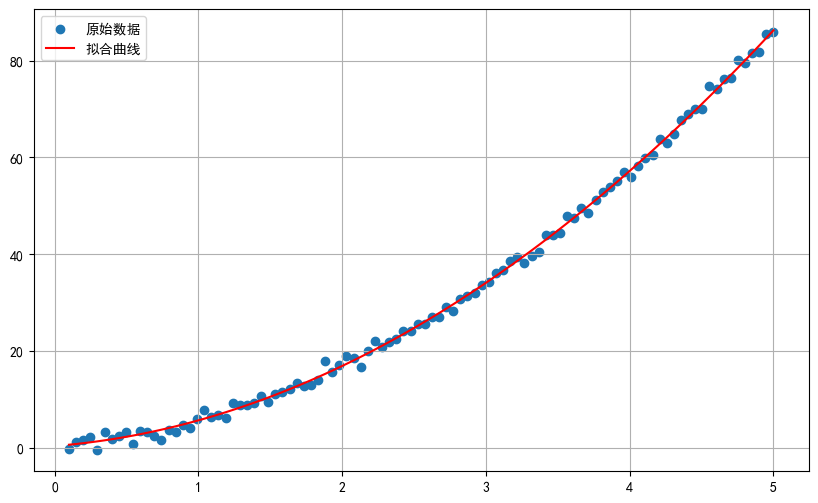

In [638]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei' # 中文支持

fig, ax = plt.subplots(figsize=(10, 6))

# 绘制原始数据
ax.scatter(x_data, y_data, label='原始数据')

# 绘制拟合曲线
ax.plot(x_data, np.poly1d(popt)(x_data), color='red', label='拟合曲线')

ax.grid(True)
ax.legend()
plt.show()